## Excavator Activity Analysis 
----
<font size = 4 > This repository is containing data analysis of sensor node attached to an excavator for activity classification. </font>

----

### Data
<font size = 4 >  Data contains sensor data from 3 different sensors attached to the excavator. Sensors include;  </font> 

*  <a href="https://www.sparkfun.com/products/15335"> ICM-20948 </a> IMU for built-in logging of:
    * 3-axis Accelerometer
    * 3-axis Gyroscope
    * 3-axis Magnetometer
 
* <a href = "https://www.sparkfun.com/products/15005"> NEO-M9N GPS Module </a> is a 92-channel u-blox M9 engine GNSS receiver, with ~1.5 meter accuracy
* <a href =  "https://www.sparkfun.com/products/15440"> BME280 </a> atmospheric sensor breakout is an easy way to measure barometric pressure, humidity, and temperature readings.

* On-board RTC,  so that all data can be time stamped.

<font size = 4> All sensors are connected to the <a href="https://www.sparkfun.com/products/16832"> The SparkFun OpenLog Artemis </a>board, open source data logger,  via I<sup>2</sup>C</font> bus.

<font size=4>  Collected data is in the data folder. As an initial data collection setup, two sensor nodes are arranged. </font>
* A node with all sensors attached to the excavator
* A node without GPS sensor.

<font size=4> The sensor setup is depicted in the picture below.</font>
<!-- 
Add image of the sensor setup here.
-->

<img src=./data/img/sensor-setup.png width=600 height=500>

There is also a video of the data collection process and link to the video will be added here.

## Import Required Libraries for data analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Read the data from the txt file.
    We only use data-02 files for the synchronization with the video.

In [2]:
### Read data
## Discard first data -01 . It is data when the sensor is mounted to the machine.
# data_with_gps = pd.read_csv("data/data-gps-included-01.TXT") 
data_with_gps = pd.read_csv("data/data-gps-included-02.TXT")
## Discard first data -01 . It is data when the sensor is mounted to the machine.
# data_no_gps = pd.read_csv("data/data-no-gps-01.TXT")
data_no_gps = pd.read_csv("data/data-no-gps-02.TXT")
### Concatenate data
# data_with_gps = pd.concat([data_with_gps,data_with_gps_2])
# data_no_gps = pd.concat([data_no_gps,data_no_gps_2])
### Drop unnamed column
data_with_gps=data_with_gps.drop(['Unnamed: 27'], axis=1)
data_no_gps=data_no_gps.drop(['Unnamed: 17'], axis=1)

## Check the data shape

In [3]:
print("No GPS Sensor node data shape : ",data_no_gps.shape)
print("With GPS Sensor node data shape : ",data_with_gps.shape)
print("Time range of data with GPS : ",data_with_gps['rtcTime'].min()," to ",data_with_gps['rtcTime'].max())
print("Time range of data without GPS : ",data_no_gps['rtcTime'].min()," to ",data_no_gps['rtcTime'].max())

No GPS Sensor node data shape :  (202313, 17)
With GPS Sensor node data shape :  (13853, 27)
Time range of data with GPS :  01:00:01.00  to  01:23:37.53
Time range of data without GPS :  01:00:00.65  to  01:20:34.72


## Check data headers and data types - NO GPS SENSOR NODE

In [5]:
data_no_gps.head()

,rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,pressure_Pa,humidity_%,altitude_m,temp_degC,output_Hz
0,01/01/2000,01:00:00.65,-990.72,-16.11,42.48,0.34,-2.56,-1.20,223.5,65.85,-684.75,22.37,100904.67,41.80,35.05,15.85,165.901
1,01/01/2000,01:00:00.66,-1011.23,-7.32,48.83,-0.66,1.48,-1.19,225.0,66.90,-685.20,22.52,100907.19,41.81,34.84,15.85,165.901
2,01/01/2000,01:00:00.66,-1005.86,-3.42,44.92,-1.73,-1.72,-0.91,225.0,66.90,-685.20,22.42,100907.19,41.80,35.28,15.84,165.901
3,01/01/2000,01:00:00.67,-990.23,-3.91,38.57,0.47,3.19,0.84,226.5,69.60,-688.05,22.37,100900.22,41.80,35.42,15.84,165.901
4,01/01/2000,01:00:00.67,-1018.55,-6.35,42.48,-0.76,-0.15,1.24,226.8,68.85,-688.35,22.37,100905.51,41.72,34.98,15.84,165.901


In [6]:
data_no_gps.describe()

,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,pressure_Pa,humidity_%,altitude_m,temp_degC,output_Hz
count,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000,202313.000000
mean,-911.407972,-6.567673,-28.863938,0.176813,-0.591975,0.376162,221.651157,51.519534,-706.004952,21.686354,100897.500314,42.552734,35.642101,14.858222,165.640958
std,356.948237,119.223517,412.107341,11.288241,7.633475,9.028614,12.087409,53.705168,42.767979,0.400127,13.076417,1.074147,1.096553,0.509800,0.147200
min,-7192.870000,-8000.000000,-8000.000000,-250.140000,-250.140000,-250.140000,-259.650000,-202.500000,-1017.750000,19.930000,100456.310000,41.410000,-6.940000,13.380000,165.399000
25%,-1010.740000,-18.550000,-79.100000,-1.120000,-2.110000,-1.070000,217.500000,63.900000,-713.850000,21.460000,100890.610000,42.250000,34.940000,14.590000,165.505000
50%,-1000.980000,-3.910000,43.460000,0.180000,-0.610000,0.190000,225.150000,66.750000,-687.900000,21.660000,100901.220000,42.440000,35.330000,14.830000,165.645000
75%,-952.640000,6.840000,104.980000,1.440000,0.930000,1.470000,226.800000,67.950000,-686.100000,21.990000,100905.910000,42.560000,36.220000,15.200000,165.765000
max,7999.760000,6711.910000,7999.760000,250.130000,250.130000,250.130000,267.900000,74.700000,-369.150000,22.810000,101406.720000,53.070000,72.560000,15.860000,165.901000


## Check data headers and data types - WITH GPS SENSOR NODE

In [7]:
print(data_with_gps.head())

      rtcDate      rtcTime       aX     aY     aZ    gX    gY    gZ      mX  \
0  01/01/2000  01:00:01.00 -1009.77   1.46  19.04  2.22  0.43  4.24  260.55   
1  01/01/2000  01:00:01.10  -995.12 -19.04  18.55  0.41 -1.11  2.01  261.15   
2  01/01/2000  01:00:01.21 -1005.37 -23.93  16.11 -0.06 -1.88  2.01  259.65   
3  01/01/2000  01:00:01.31  -991.70 -11.23  16.60 -0.28 -1.50  4.32  261.75   
4  01/01/2000  01:00:01.41 -1012.21  -9.28  12.70  2.25 -2.42 -1.11  260.40   

       mY  ...  gps_SIV  gps_FixType gps_GroundSpeed gps_Heading  gps_pDOP  \
0 -486.00  ...       16            3              22    27526250       158   
1 -485.85  ...       16            3              36    27526250       158   
2 -486.30  ...       16            3              30    27526250       158   
3 -485.70  ...       16            3               9    27526250       158   
4 -487.05  ...       16            3              19    27526250       158   

   pressure_Pa  humidity_%  altitude_m  temp_degC  outpu

In [8]:
print(data_with_gps.describe())

                 aX            aY            aZ            gX            gY  \
count  13853.000000  13853.000000  13853.000000  13853.000000  13853.000000   
mean    -902.038928     -5.869628   -105.868894      0.244927     -0.602615   
std      321.004695    100.596777    344.466862      8.655575      6.316813   
min    -2118.160000  -2047.360000  -3513.180000   -108.090000   -105.150000   
25%    -1007.810000    -18.550000   -196.290000     -0.980000     -2.270000   
50%    -1000.000000     -9.280000      9.770000      0.280000     -0.620000   
75%     -958.010000      0.980000     18.070000      1.500000      1.070000   
max     1621.090000   2057.620000   7999.760000     81.020000    202.340000   

                 gZ            mX            mY            mZ      imu_degC  \
count  13853.000000  13853.000000  13853.000000  13853.000000  13853.000000   
mean       0.565763    251.967083   -468.622739   -675.503858     22.614861   
std        4.756028     29.884964     78.056140    

## Plot - GPS SENSOR NODE DATA

In [9]:
g = data_with_gps.plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value",style='.-')
plt.show()

## Plot NO-GPS SENSOR NODE DATA

In [10]:
g = data_no_gps.plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value")
plt.show()

## Focus on Accelerometer Data - NO GPS SENSOR NODE ~165 Hz 

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_no_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
data_no_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
data_no_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration');

## Focus on Accelerometer Data - WITH GPS SENSOR NODE ~10 Hz

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_with_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
data_with_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
data_with_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration');

## Focus on Active Region in Accelerometer Data

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_no_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
axes[0].set_xlim([len(data_no_gps['aX'])-13e4, len(data_no_gps['aX'])])
data_no_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
axes[1].set_xlim([len(data_no_gps['aX'])-13e4, len(data_no_gps['aX'])])
data_no_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration')
axes[2].set_xlim([len(data_no_gps['aX'])-13e4, len(data_no_gps['aX'])])
# axes[2].set_xticks(axes[2].get_xticks()[:-1])

(72313.0, 202313.0)

## Show data distribution using histogram

In [14]:
g=data_no_gps.hist(figsize=(20,20))

### Manually remove no movement data. Try later

In [15]:
# a = np.array(data_no_gps['aY'].values.tolist())
# print(data_no_gps['aY'].mean())
# data_no_gps['aY'] = np.where(np.absolute(a) < 10, np.nan, a).tolist()
# data_no_gps.plot(x='rtcTime', y='aY', figsize=(20,10))

## Use Z-score to remove outliers with threshold of 3. 
    Meaning that values that are 3 standard deviations away from the mean will be removed.

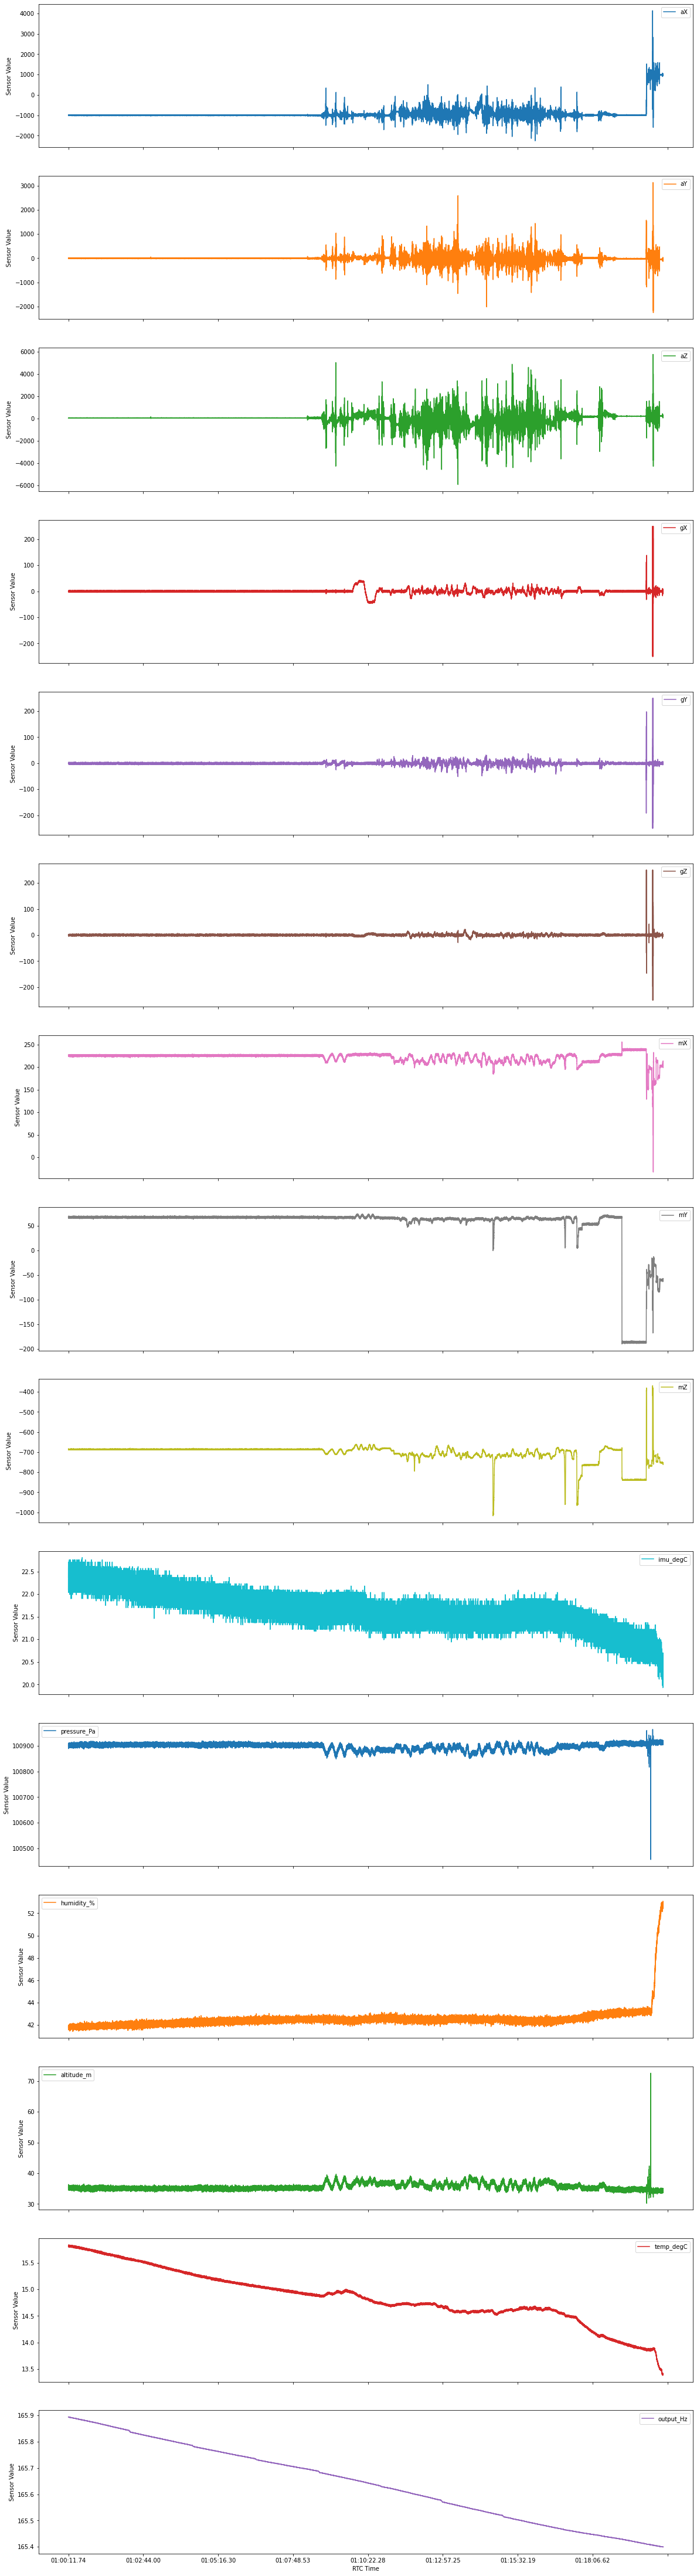

In [4]:
# from scipy import stats
# removed_outliers=data_no_gps[(np.abs(stats.zscore(data_no_gps['aX])) < threshold)]
threshold = 5
window = 165
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z
removed_outliers=data_no_gps[(np.abs(zscore(data_no_gps['aX'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['aY'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['aZ'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['gX'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['gY'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['gZ'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['mX'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['mY'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['mZ'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['pressure_Pa'],window)) < threshold)]
removed_outliers=removed_outliers[(np.abs(zscore(removed_outliers['altitude_m'],window)) < threshold)]

g = removed_outliers.plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value")

In [5]:
print("No GPS Sensor node data shape : ",removed_outliers.shape)
print("With GPS Sensor node data shape : ",removed_outliers.shape)
print("Time range of data with GPS : ",removed_outliers['rtcTime'].min()," to ",removed_outliers['rtcTime'].max())
print("Time range of data without GPS : ",removed_outliers['rtcTime'].min()," to ",removed_outliers['rtcTime'].max())

No GPS Sensor node data shape :  (198554, 17)
With GPS Sensor node data shape :  (198554, 17)
Time range of data with GPS :  01:00:11.74  to  01:20:34.72
Time range of data without GPS :  01:00:11.74  to  01:20:34.72


## Compare the data before and after removing outliers

In [7]:
%matplotlib
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(24,24))

data_no_gps.plot(x='rtcTime', y=['aX'],ax=axes[0, 0], marker='+')  # type: ignore
axes[0, 0].set_title("x-axis acceleration")
axes[0, 0].set_xlim([len(data_no_gps['aX'])-12e4, len(data_no_gps['aX'])])
#####################################################
removed_outliers.plot(x='rtcTime', y=['aX'],ax=axes[0,1])
axes[0,1].set_title("x-axis acceleration")
axes[0,1].set_xlim([len(removed_outliers['aX'])-11e4, len(removed_outliers['aX'])])


data_no_gps.plot(x='rtcTime', y='aY' ,ax=axes[1,0])
axes[1,0].set_title('y-axis acceleration')
axes[1,0].set_xlim([len(data_no_gps['aX'])-12e4, len(data_no_gps['aX'])])
#########################################################
removed_outliers.plot(x='rtcTime', y='aY' ,ax=axes[1,1])
axes[1,1].set_title('y-axis acceleration')
axes[1,1].set_xlim([len(removed_outliers['aX'])-11e4, len(removed_outliers['aX'])])

data_no_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2,0])
axes[2,0].set_title('z-axis acceleration')
axes[2,0].set_xlim([len(data_no_gps['aX'])-12e4, len(data_no_gps['aX'])])

##########################################################
removed_outliers.plot(x='rtcTime', y='aZ' ,ax=axes[2,1])
axes[2,1].set_title('z-axis acceleration')
axes[2,1].set_xlim([len(removed_outliers['aX'])-11e4, len(removed_outliers['aX'])])
# axes[2].set_xticks(axes[2].get_xticks()[:-1])

Using matplotlib backend: <object object at 0x7f9b6447b550>


(88554.0, 198554.0)

: 

## K-means Clustering

In [ ]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=5)

# Fitting Model
model.fit(data_no_gps[['aX','aY','aZ']])

# Prediction on the entire data
all_predictions = model.predict(data_with_gps[['aX','aY','aZ']])

# Printing Predictions
print(all_predictions)


[1 1 1 ... 1 1 1]


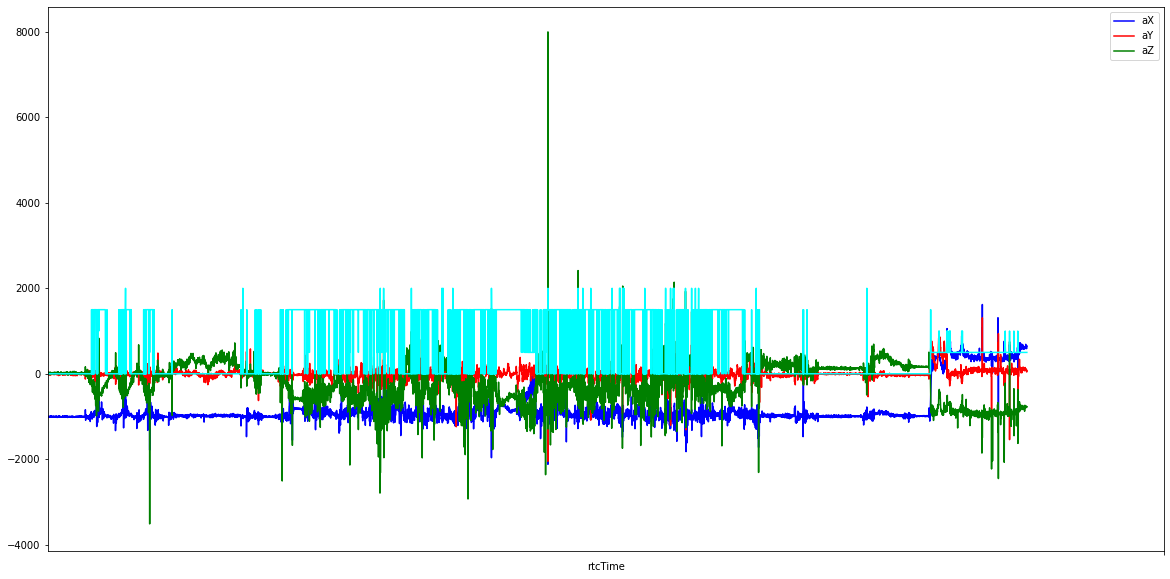

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = data_with_gps.plot(x='rtcTime',y=['aX'],ax=ax,color= 'blue')
ax = data_with_gps.plot(x='rtcTime',y=['aY'],ax=ax, color= 'red')
ax = data_with_gps.plot(x='rtcTime',y=['aZ'],ax=ax, color= 'green')
ax.set_xlim(4.2e4, 5e4)
# plt.plot(x=data_with_gps['rtcTime'], data_with_gps['aX'], label='aX')
# plt.plot(data_with_gps['rtcTime'], data_with_gps['aY'], label='aY')
# plt.plot(data_with_gps['rtcTime'], data_with_gps['aZ'], label='aZ')
ax = plt.plot(all_predictions*500, label='class_predictions', color='cyan')
plt.show()

## SK Learn TSNE Clustering example

/home/veysiadn/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


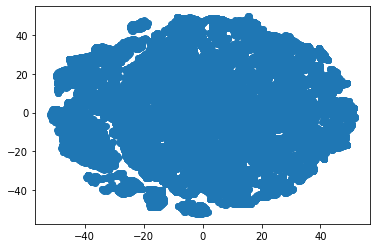

In [ ]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
# iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(data_with_gps[['aX','aY','aZ']])

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

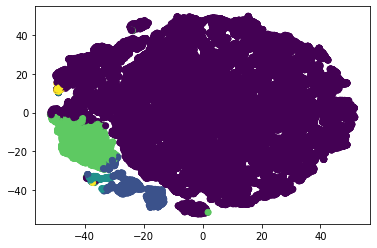

In [ ]:
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

### Example ACC DATA
```
    X = load_wisdm_dataarray()
```
<a href= 'https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz' >WISDM Dataset</a>

## Split data to 1s windows

In [ ]:
def split_dataframe(df, chunk_size = 100): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks
sample_rate = 165
total_time_seconds = data_no_gps.shape[0] / sample_rate
print("Total time : ",total_time_seconds, " seconds", " or ", total_time_seconds/60, " minutes")


splitted_data = split_dataframe(data_no_gps, chunk_size = sample_rate)
print("Number of chunks : ",len(splitted_data))
print("Chunk size : ",splitted_data[1]['aX'].shape)

#splitted_data[4500].plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value");

Total time :  4844.975757575758  seconds  or  80.74959595959596  minutes
Number of chunks :  4845
Chunk size :  (165,)


In [ ]:
def convert_list_to_df(list):
    df = pd.DataFrame(list)
    return df
df = convert_list_to_df(splitted_data)

/home/veysiadn/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
df.head()

,0
0,rtcDate rtcTime aX aY ...
1,rtcDate rtcTime aX aY ...
2,rtcDate rtcTime aX aY ...
3,rtcDate rtcTime aX aY ...
4,rtcDate rtcTime aX aY ...


In [ ]:
df.describe()

,0
count,4845
unique,4845
top,rtcDate rtcTime aX aY ...
freq,1


In [ ]:
def get_data(data, s):
    array_data = np.empty((len(data),data[0][s].shape[0]))
    for i in range(len(data)):
        np.append(array_data,data[i][s],axis=0)
    return np.array(array_data)

data_aX = get_data(splitted_data, 'aX')
data_aY = get_data(splitted_data, 'aY')
data_aZ = get_data(splitted_data, 'aZ')


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
data_aX

array([0      51.27
       1      50.29
       2      56.64
       3      44.92
       4      56.15
              ...
       160    43.46
       161    53.22
       162    43.46
       163    55.66
       164    50.78
       Name: aX, Length: 165, dtype: float64,
       165    51.27
       166    38.57
       167    59.57
       168    51.27
       169    40.04
              ...
       325    47.85
       326    56.15
       327    46.88
       328    60.55
       329    65.43
       Name: aX, Length: 165, dtype: float64,
       330    56.15
       331    42.48
       332    38.09
       333    43.46
       334    54.20
              ...
       490    64.94
       491    56.15
       492    45.90
       493    48.83
       494    16.60
       Name: aX, Length: 165, dtype: float64, ...,
       201822     978.52
       201823     975.10
       201824     977.54
       201825     979.98
       201826     977.54
                  ...
       201982     980.96
       201983     994.14
      

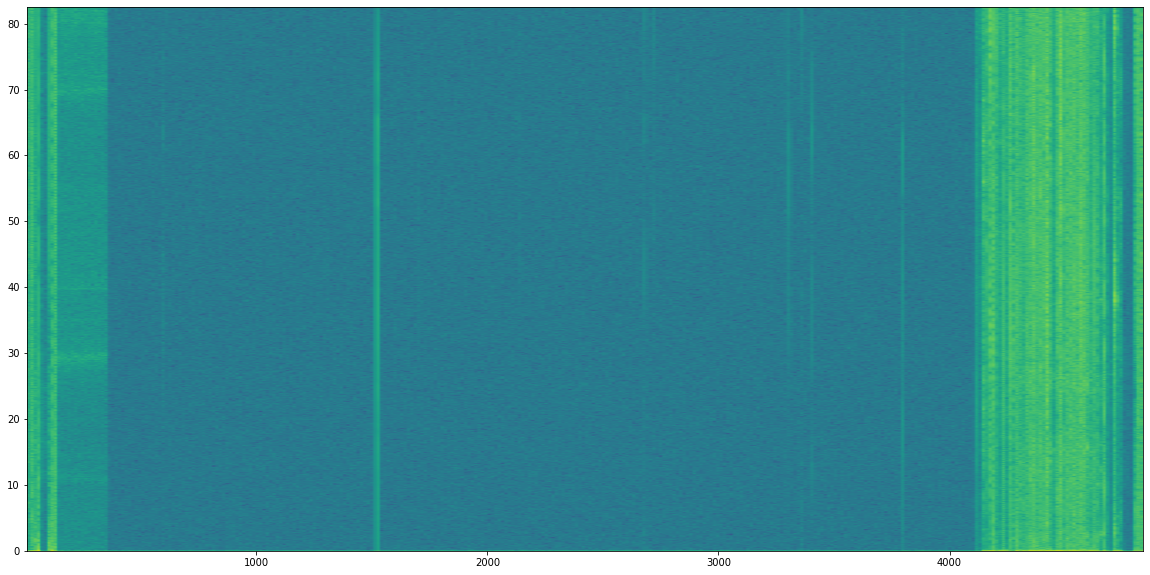

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.specgram(data_no_gps['aZ'], Fs=sample_rate, NFFT=4800, noverlap=2400, cmap='viridis',mode='psd');

In [ ]:
def df_to_array(df):
    return np.array(df)

df = pd.DataFrame({'col1':[1,2], 'col2':[3,4], 'col3':[5,6]})
df2 = pd.DataFrame({'col1':[7,8], 'col2':[9,10], 'col3':[11,12]})

print(df_to_array(pd.concat([df,df2])))

[[ 1  3  5]
 [ 2  4  6]
 [ 7  9 11]
 [ 8 10 12]]
